# <b>Ultimate Technologies Data Excercise</b>

## <b>Part 1 ‑ Exploratory data analysis</b>
<font size="3">The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.</font>

In [1]:
#Import packages
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
from dateutil.relativedelta import relativedelta

In [2]:
#Read-in JSON files, then convert to pandas dataframe
with open('C:/datascience/springboard/mini projects/ultimate_challenge/logins.json') as read_file:
    login_data = json.load(read_file)
    login_data = pd.DataFrame.from_dict(login_data, orient='columns')

In [3]:
#Count number of logins in 15 minute intervals
login_data['login_time'] = pd.to_datetime(login_data['login_time'])
login_data.loc[:, 'login_ct'] = 1
login_data.sort_values('login_time')
login_data = login_data.set_index('login_time')
login_data = login_data.resample('15min').sum().reset_index()

#Isolate times for comparison (15min intervals)
login_data.loc[:, 'time'] = [d.time() for d in login_data['login_time']]
login_data['time'] = login_data['time'].apply(lambda x: x.strftime("%H:%M"))
time_data = login_data.groupby('time')['login_ct'].agg('sum').reset_index()

C:\Users\KKanoe\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


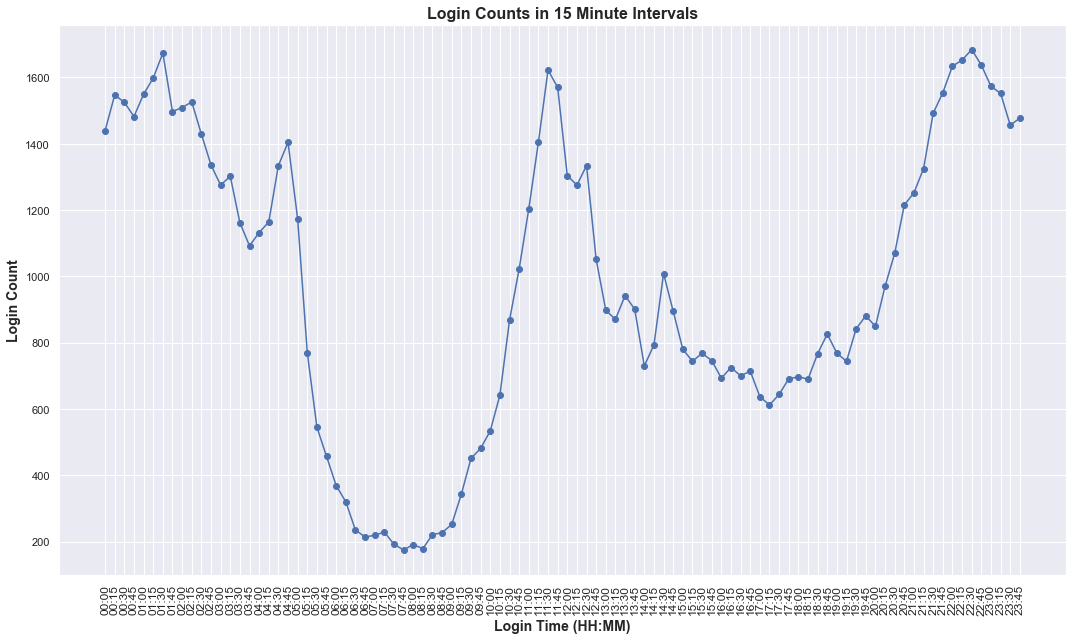

In [4]:
#Visualize Demand
#Peak times of demand
fig, ax = plt.subplots(figsize=(15,9)) 

ax.plot_date(time_data['time'], time_data['login_ct'], linestyle='-')
plt.title('Login Counts in 15 Minute Intervals', fontsize=16, fontweight='bold')
plt.xlabel('Login Time (HH:MM)', fontsize=14, fontweight='bold')
plt.ylabel('Login Count', fontsize=14, fontweight='bold')
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

## Part 2 ‑ Experiment and metrics design
<font size="3">The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.<br>

<b>1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?</b><br>

Toll Balance Ratio = Toll 1 Reimbursement Amount / Toll 2 Reimbursement Amount. Normalized by number of drivers in each city. A likely conflict would be imbalances in toll reimbursements by city. In order to provide a fair measure, this ratio would account for this disparity as well as give you a sense of how each city is responding to the new reimbursement policy.

<b><br>2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:<br>

a. how you will implement the experiment<br>
b. what statistical test(s) you will conduct to verify the significance of the
observation<br>
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.</b><br>

Since driver activity was exclusive to each city prior to the new policy, no base rate is relevant (other than zero). Given this predicament, we would need to observe the toll patterns over time and monitor growth and peak usage. I suggest 90 days, which would be enough time for the drivers to become comfortable with the new policy and allow for enough data to discern some reasonable pattern.<br>
    
a) City managers will report reimbursement amounts on a daily basis as well as the drivers primary city. The Toll balance ratio will be calculated and charted on daily basis.<br>
    
b) This is where the individual drivers primary city comes into play. I would run a statistical test to check for class imbalance for each driver to discern if a pattern exists between each cities drivers pools. Various factors such as geography, economic composition (i.e. retail vs business), and residential trends may be underlying factors that may affect imbalances.<br>

c) If an imbalance exists, you’ll need to walk the tightrope of the economic disparity. The city on the losing end (i.e. one city is losing out on significant toll revenue) suffer from the “winners curse”, so how do you convince them of the benefit of the agreement? My inclination would be to quantify the economic impact as a result of the increased traffic and its negation of any economic loss on the toll revenue. </font>

## Part 3 ‑ Predictive modeling
<font size="3">Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.<br>
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?<br>
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.<br>
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).<br>
Data description<br>
city: city this user signed up in<br>
phone: primary device for this user<br>
signup_date: date of account registration; in the form ‘YYYY MM DD’<br>
last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’<br>
avg_dist: the average distance in miles per trip taken in the first 30 days after <br>
avg_rating_by_driver: the rider’s average rating over all of their trips<br>
avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips<br>
surge_pct: the percent of trips taken with surge multiplier > 1<br>
avg_surge: The average surge multiplier over all of this user’s trips<br>
trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up<br>
ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise<br>
weekday_pct: the percent of the user’s trips occurring during a weekday</font>

In [5]:
#Load city data and convert to dataframe
with open('C:/datascience/springboard/mini projects/ultimate_challenge/ultimate_data_challenge.json') as read_file:
    city_data = json.load(read_file)
    city_data = pd.DataFrame.from_dict(city_data, orient='columns')

In [6]:
#Convert columns to datetime
city_data['last_trip_date'] = pd.to_datetime(city_data['last_trip_date'])
city_data['signup_date'] = pd.to_datetime(city_data['signup_date'])
city_data.loc[:, 'ultimate_black_user'] = np.where(city_data['ultimate_black_user'] == True, 1, 0)

#Format df
float_conv = city_data.select_dtypes(include=['float']).apply(pd.to_numeric, downcast='float')
int_conv = city_data.select_dtypes(include=['int64']).apply(pd.to_numeric, downcast='unsigned')
object_conv = city_data.select_dtypes(include=['object'])

#Determine if unique values in object column are less than 50% of total values. If less, change to category, otherwise leave as object
for col in object_conv.columns:
    num_unique_values = len(object_conv[col].unique())
    num_total_values = len(object_conv[col])
    if num_unique_values / num_total_values < 0.5:
        object_conv.loc[:, col] = object_conv[col].astype('category')
    else:
        object_conv.loc[:, col] = object_conv[col]
#Overlay converted columns dtypes on original city_data. This acheived as estimated 90% reduction in memory usage
city_data[float_conv.columns] = float_conv
city_data[int_conv.columns] = int_conv
city_data[object_conv.columns] = object_conv

#Remove unneeded variables
del(col, float_conv, int_conv, num_total_values, num_unique_values, object_conv)

C:\Users\KKanoe\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\KKanoe\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
#Deal with nans
#driver rtg
mean_rtg = city_data['avg_rating_of_driver'].mean()
city_data.loc[:, 'avg_rating_of_driver'] = np.where(city_data['avg_rating_of_driver'].isnull(), mean_rtg, city_data['avg_rating_of_driver'])

#rider rtg
mean_rtg_driver = city_data['avg_rating_by_driver'].mean()
city_data.loc[:, 'avg_rating_by_driver'] = np.where(city_data['avg_rating_by_driver'].isnull(), mean_rtg_driver, city_data['avg_rating_by_driver'])

#phone (only 0.8% loss of data)
city_data = city_data.dropna(subset=['phone'])

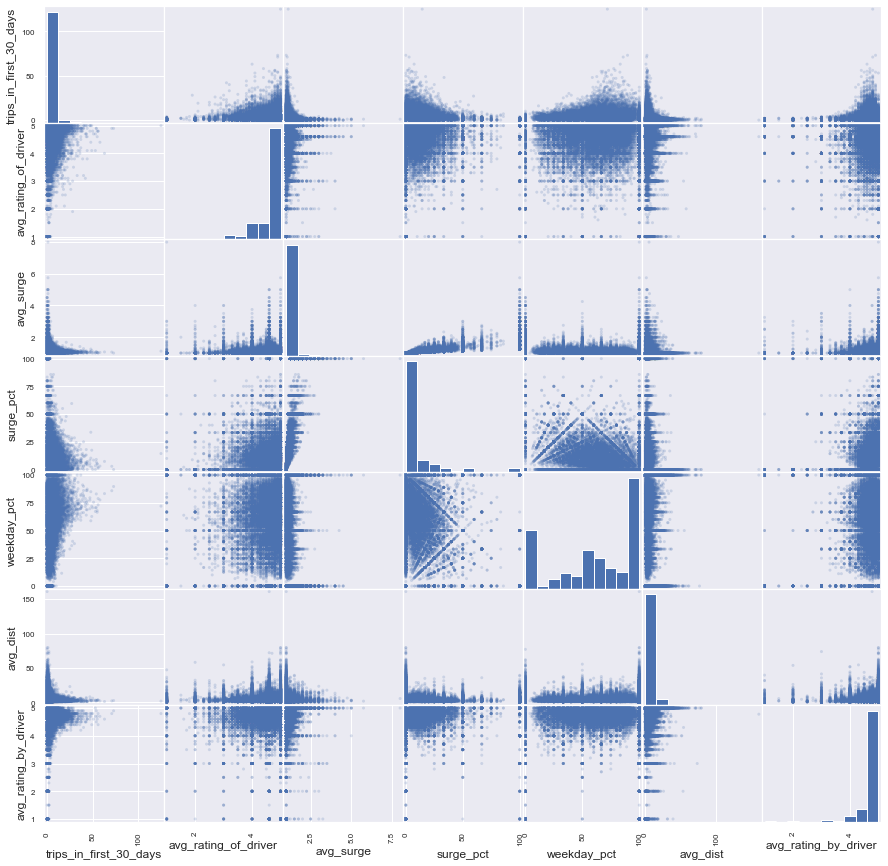

In [8]:
#Explore
#Look at potential time features to assess ranges
scat_mat = city_data.drop(columns=['city','phone','ultimate_black_user'])

#Plot using scattermatrix
pd.plotting.scatter_matrix(scat_mat, alpha=0.2, figsize=(15, 15))
plt.show()

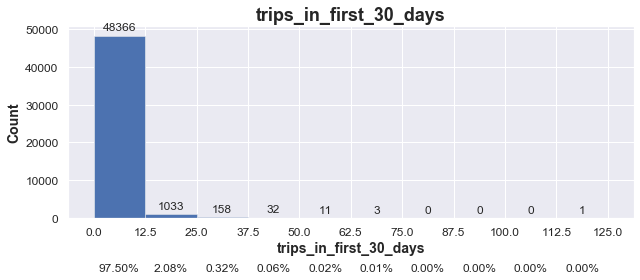

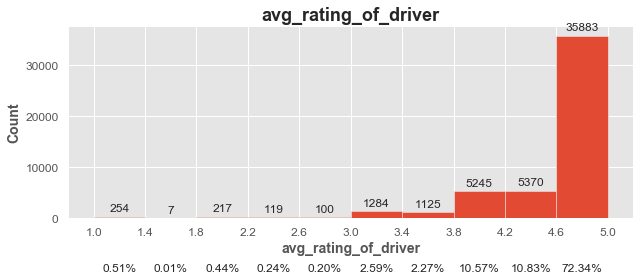

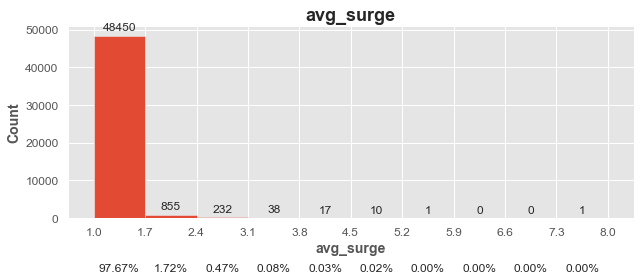

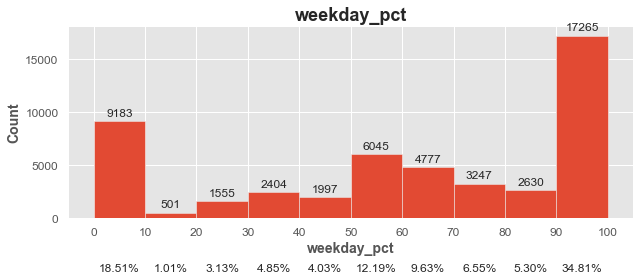

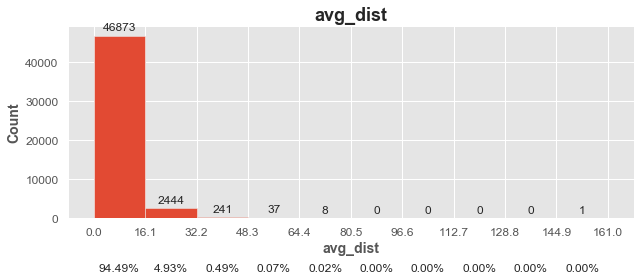

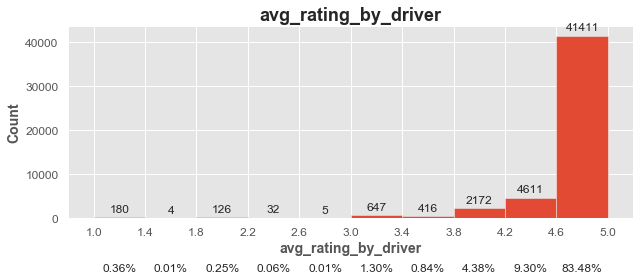

In [9]:
#Look at potential time features to assess ranges
dist_df = city_data[['trips_in_first_30_days','avg_rating_of_driver','avg_surge','weekday_pct','avg_dist','avg_rating_by_driver']]

for col in dist_df.columns:

    fig, ax = plt.subplots(figsize = (9,4))
    plt.style.use('ggplot')
    counts, bins, patches = ax.hist(dist_df[col])
    ax.set_xticks(bins)
    ax.tick_params(axis='x', direction='out', labelsize=12)
    ax.tick_params(axis='y', direction='out', labelsize=12)
    ax.set_title(col, fontsize=18, weight='bold')
    ax.set_xlabel(col, fontsize=14, weight='bold')
    ax.set_ylabel('Count', fontsize=14, weight='bold')

    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for patch, count, x in zip(patches, counts, bin_centers):
        #Get x and y placement of label
        y_value = patch.get_height()
        x_value = patch.get_x() + patch.get_width() / 2

        #Number of points between bar and label
        space = 3

        #Vertical alignment of positive values
        va = 'bottom'

        #If value of bar is negative: place label below
        if y_value < 0:
            space *= -1
            va = 'top'

        #Use y-value as label and format number with zero decimal place
        label = "{:.0f}".format(y_value)

        #Create annotation
        plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords='offset points', ha='center', va=va, size=12)

        #Label the issuer percentages 
        percent = '%00.2f%%' % (100* float(count) / counts.sum())
        ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'), xytext=(0, -45), textcoords='offset points', 
                    va='top', ha='center', size=12)

    plt.tight_layout()

In [10]:
#Determine "Active" user
#Use 30 days from most recent trip as no specific dates given only preceding 30 days
cutoff_date = city_data['last_trip_date'].max() - relativedelta(days=30)
city_data.loc[:, 'active_user'] = np.where(city_data['last_trip_date'] >= cutoff_date, 1, 0)

#Calculate time as customer  - This dominated other features and not sure it should be included.
city_data.loc[:, 'days_as_customer'] = (city_data['last_trip_date'] - city_data['signup_date']).dt.days

#Encode Categoricals (I found this method simpler than Scikit Learn's Binarizer function)
#Create new df that's prepped for ML usage
ml_df = city_data.copy()

#City
ml_df['kings_landing'] = np.where(ml_df['city'].str.contains("King's Landing"), 1, 0)
ml_df['astapor'] = np.where(ml_df['city'].str.contains("Astapor"), 1, 0)
ml_df['winterfell'] = np.where(ml_df['city'].str.contains("Winterfell"), 1, 0)

#Phone
ml_df['iphone'] = np.where(ml_df['phone'].str.contains("iPhone"), 1, 0)
ml_df['android'] = np.where(ml_df['phone'].str.contains("Android"), 1, 0)

#Drop Encoded columns
ml_df = ml_df.drop(columns=['city','signup_date','last_trip_date','phone'])

In [11]:
#Import ML Packages
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectFromModel

In [12]:
#Encode tgt column, specify X,Y values, scale X values, Split data into training and test sets
tgt_enc = LabelEncoder().fit(ml_df['active_user'])
tgt_encoded = tgt_enc.transform(ml_df['active_user'])
ml_df = ml_df.drop(columns='active_user')

X = ml_df.values
Y = tgt_encoded

scaled_X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#Instantiate RandomForestClassifier with base parameters
model_RandTree = RandomForestClassifier(random_state=0, n_jobs=-1)
model_RandTree.fit(X_train, y_train)

C:\Users\KKanoe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

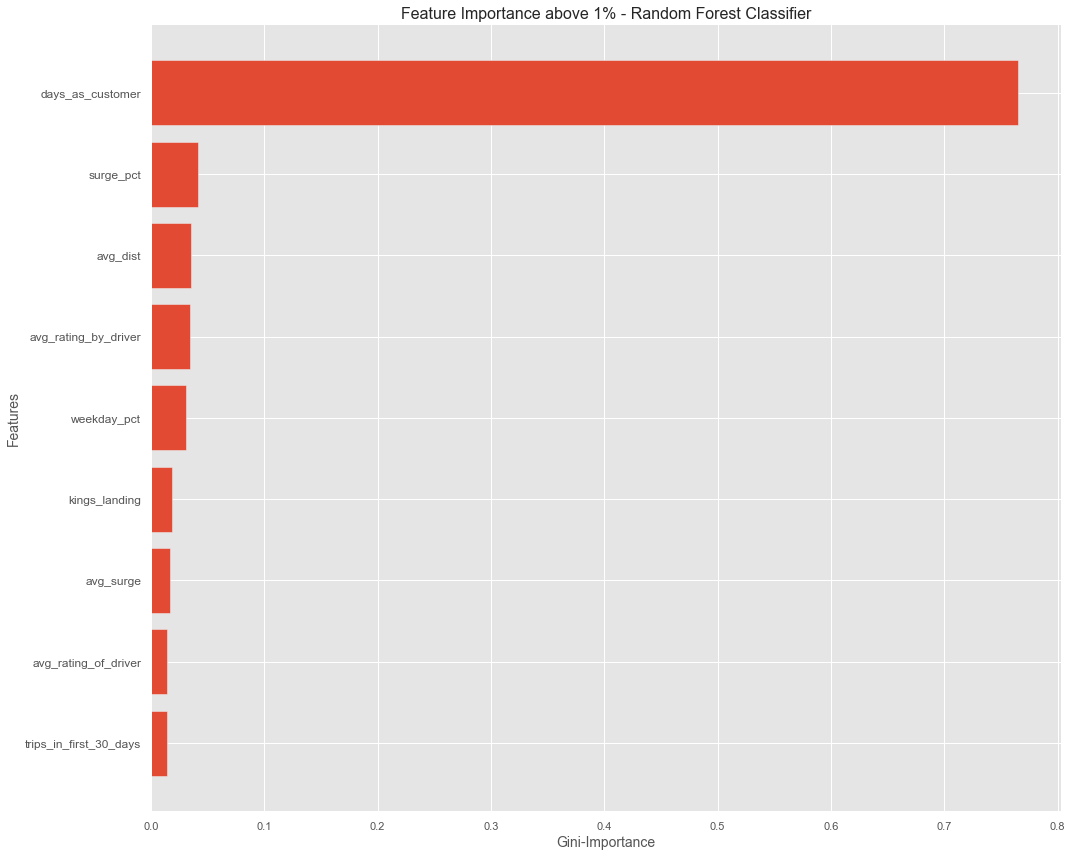

In [13]:
#Visualize feature importance
features_RandTree = {}

for feature, importance in zip(ml_df.columns, model_RandTree.feature_importances_):
    features_RandTree[feature] = importance

importances_RandTree = pd.DataFrame.from_dict(features_RandTree, orient='index').rename(columns={0: 'Gini-Importance'})
importances_RandTree = importances_RandTree.sort_values(by='Gini-Importance', ascending=True)
importances_RandTree  = importances_RandTree[importances_RandTree['Gini-Importance'] >= 0.01]

fig, ax = plt.subplots(figsize=(15,12))
plt.barh(importances_RandTree.index, importances_RandTree['Gini-Importance'])
plt.title('Feature Importance above 1% - Random Forest Classifier', fontsize=16)
ax.set_ylabel('Features', fontsize=14)
ax.set_yticklabels(importances_RandTree.index, fontsize=12)
ax.set_xlabel('Gini-Importance', fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
#Subset original df using identified highest importance features
sfm_RandTree = SelectFromModel(model_RandTree, threshold=0.05)
sfm_RandTree.fit(X_train, y_train)

#Print selected features
selected_feat = []

for feature_list_index in sfm_RandTree.get_support(indices=True):
    print(ml_df.columns[feature_list_index])
    selected_feat.append(ml_df.columns[feature_list_index])

X_important_train = sfm_RandTree.transform(X_train)
X_important_test = sfm_RandTree.transform(X_test)

days_as_customer


In [15]:
#Begin process of parameter tuning using RandomizedSearch
#Number of Trees
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=30)]

#Number of features at each split
max_features = ['auto','sqrt']

#Max depth of each tree
max_depth = [int(x) for x in np.linspace(start=5, stop=100, num=20)]
max_depth.append(None)

#Min samples at each split
min_samples_split = [int(x) for x in np.linspace(start=2, stop=100, num=10)]

#Minimun samples at base leaf
min_samples_leaf = [int(x) for x in np.linspace(start=2, stop=100, num=10)]

#Method of selecting samples for training each tree
bootstrap = [True, False]

#Place all parameter ranges in grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [10, 44, 78, 112, 146, 180, 214, 248, 283, 317, 351, 385, 419, 453, 487, 522, 556, 590, 624, 658, 692, 726, 761, 795, 829, 863, 897, 931, 965, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, None], 'min_samples_split': [2, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'min_samples_leaf': [2, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'bootstrap': [True, False]}


In [16]:
#Instantiate instance of RandomForestClassifier
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, 
                               random_state=42, n_jobs=-1)

#Fit to training set with selected features
rf_random.fit(X_important_train, y_train)

#Best parameters from randomized search cv
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 33.9min finished


{'n_estimators': 283,
 'min_samples_split': 56,
 'min_samples_leaf': 67,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [17]:
#Use grid search using best parameters plus some additional paramters to test edges of best_params
param_grid = {
              'bootstrap': [True],
              'max_depth': [5, 20, 50],
              'max_features': ['sqrt'],
              'min_samples_leaf': [2, 5, 10],
              'min_samples_split': [50, 100, 150],
              'n_estimators': [500, 1000, 1500]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)  

# Fit the grid search to the data
grid_search.fit(X_important_train, y_train)

#View results of grid_search
grid_search.best_params_
best_grid = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 47.9min finished


In [18]:
#Base Model Evaluation
base_model = RandomForestClassifier(n_estimators=10, random_state=4)
base_model.fit(X_important_train, y_train)
base_model_pred = base_model.predict(X_important_test)

#RandomizedSearch Tuned Model Evaluation 
tuned_model = RandomForestClassifier(**rf_random.best_params_, random_state=5)
tuned_model.fit(X_important_train, y_train)
tuned_model_pred = tuned_model.predict(X_important_test)

#Grid Search Tuned Model
best_grid.fit(X_important_train, y_train)
best_grid_pred = best_grid.predict(X_important_test)

#Train and create prediction values for full dataset to compare to selected features
tuned_model.fit(X_train, y_train)
tuned_model_pred_full = tuned_model.predict(X_test)

best_grid.fit(X_train, y_train)
best_grid_pred_full = best_grid.predict(X_test)

#Base Model Score versus Parameter tuned models
print("Base Model Accuracy Score: %s" % round(accuracy_score(y_test, base_model_pred),2))
print("Tuned Model Accuracy Score: %s" % round(accuracy_score(y_test, tuned_model_pred),2))
print("Tuned Model Accuracy Score - Full Dataset: %s" % round(accuracy_score(y_test, tuned_model_pred_full),2))
print("Best Grid Model Accuracy Score: %s" % round(accuracy_score(y_test, best_grid_pred),2))
print("Best Grid Model Accuracy Score - Full Dataset: %s" % round(accuracy_score(y_test, best_grid_pred_full),2))
print("Best RCV Parameters: %s", rf_random.best_params_)
print("Best GSCV Parameters: %s", best_grid)

Base Model Accuracy Score: 0.95
Tuned Model Accuracy Score: 0.95
Tuned Model Accuracy Score - Full Dataset: 0.96
Best Grid Model Accuracy Score: 0.95
Best Grid Model Accuracy Score - Full Dataset: 0.96
Best RCV Parameters: %s {'n_estimators': 283, 'min_samples_split': 56, 'min_samples_leaf': 67, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
Best GSCV Parameters: %s RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


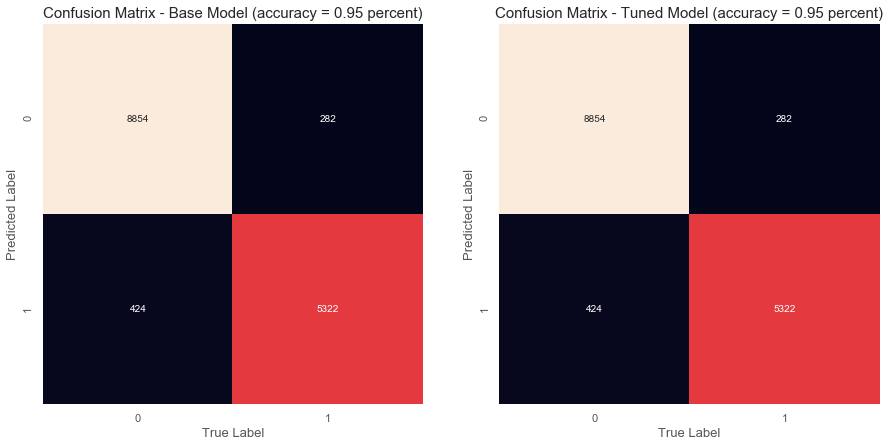

In [19]:
#Graph confusion matrix for full dataset and dataset using top features
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
mat1 = confusion_matrix(y_test, base_model_pred)
mat2 = confusion_matrix(y_test, tuned_model_pred)

sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False, ax=ax1)
ax1.set_title('Confusion Matrix - Base Model (accuracy = %s percent)' 
              % round(accuracy_score(y_test, base_model_pred),2), fontsize=15)
ax1.set_xlabel('True Label', fontsize=13)
ax1.set_ylabel('Predicted Label', fontsize=13)
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)

sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False, ax=ax2)
ax2.set_title('Confusion Matrix - Tuned Model (accuracy = %s percent)' % 
              round(accuracy_score(y_test, tuned_model_pred),2), fontsize=15)
ax2.set_xlabel('True Label', fontsize=13)
ax2.set_ylabel('Predicted Label', fontsize=13)
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top- 0.5)

plt.show()

In [20]:
#Classification Report
print("Random Forest - Base Model:" + '\n' + classification_report(y_test, base_model_pred))
print("Random Forest - Tuned Model:" + '\n' + classification_report(y_test, tuned_model_pred))

Random Forest - Base Model:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9278
           1       0.93      0.95      0.94      5604

    accuracy                           0.95     14882
   macro avg       0.95      0.95      0.95     14882
weighted avg       0.95      0.95      0.95     14882

Random Forest - Tuned Model:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9278
           1       0.93      0.95      0.94      5604

    accuracy                           0.95     14882
   macro avg       0.95      0.95      0.95     14882
weighted avg       0.95      0.95      0.95     14882



## Results Evaluation

Using days_as_customer feature only:

The model performed remarkably well with only the days_as_customer feature (95% accuracy), which naurally leads to skepticism. Despite the skepticism, the intuitive nature of the datapoint is undeniable; customers who have been loyal over longer periods are likely to be your most active user. As far as promotional strategies go, paying attention to and rewarding customers who have been using your program the longest would be the best strategy.

Not using days_as_customer:

The tuned model acheived useful performance, with an overall accuracy score of 74%. Using the the full dataset, the overall accracy score increased to 78% indicating my variance threshold was too high (I decreased to 5% variance threshold and the score increased to 77%). There was a bit of imbalance in f1 scores where the model did a worse job of predicting active users. It would be worth re-visiting some of the model assumptions to see if this gap could be closed to make the model more useful. Also, trying other classification models would be worthwhile.    

Some qualitative thoughts around the model output focus on the most important features, namely, average distance and weekly percent. With the large majority of riders taking short trips (under 16 miles), it makes sense to focus on this cohort with are likely to have geographic similarities (i.e. city dwellers). Furthermore, distinctions between weekday riders and weekend riders is important. In both cases it would make sense to optimize pricing and promotions to focus on these key features. 